<a href="https://colab.research.google.com/github/benjaminutter/AI/blob/main/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import sklearn as sk
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

from keras.datasets import mnist
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/nasa_asteroid.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
# Data Analysis
print('Duplicates:', df.duplicated().sum())
print('Missing values:', df.isnull().sum().sum())
print('Data Shape:', df.shape)
df.info()

Duplicates: 0
Missing values: 0
Data Shape: (4687, 40)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch D

In [ ]:
# Getting rid of unneccesary columns
print("Shape before dropping: ", df.shape)
df = df.drop(['Equinox', 'Orbit Determination Date', 'Orbiting Body', 'Neo Reference ID', 'Name', 'Epoch Date Close Approach','Close Approach Date' ], axis = 1)
print("Shape after dropping: ", df.shape)

Shape before dropping:  (4687, 40)
Shape after dropping:  (4687, 33)


After eliminating irrelevant predictors, we're left with 33 valuable predictors to aid in forecasting whether an asteroid poses a hazard or not.

In [ ]:
# Training and test data split
x = df.iloc[:, :-1]  #  all rows and all columns except the last one
y = df.iloc[:, -1]   #  all rows and only the last column

# Splitting into training, validation, and testing sets, then shuffling
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

# Split the training into training and sets
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42)



To test and train our model we split the data into 3 different sets

In [ ]:
# Scale numeric features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_valid_scaled = scaler.transform(x_valid)

Scaler function to standardize our numerical predictors

In [ ]:
# Create MLPClassifier without stopping early
mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500, random_state=44)

# Train classifier
mlp.fit(x_train_scaled, y_train)

# Calculate accuracies
train_accuracy = mlp.score(x_train_scaled, y_train)
valid_accuracy = mlp.score(x_valid_scaled, y_valid)
test_accuracy = mlp.score(x_test_scaled, y_test)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", valid_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Validation Accuracy: 0.9725609756097561
Test Accuracy: 0.9800995024875622


After initializing and training the model, we've achieved promising accuracy with two hidden layers comprising 100 and 50 neurons, but we'll explore additional hyperparameters for further optimization

In [ ]:
hyperparameters = [
    {'hidden_layer_sizes': (150, 50)},
    {'hidden_layer_sizes': (200, 100)},
    {'hidden_layer_sizes': (50, 20)},
    {'hidden_layer_sizes': (120, 40)},
    {'hidden_layer_sizes': (70, 20)},
    {'hidden_layer_sizes': (200, 50)},
    {'hidden_layer_sizes': (100, 50)}
]
results = []
for params in hyperparameters:
    model = MLPClassifier(max_iter=500, random_state=44, **params)
    model.fit(x_train_scaled, y_train)

    # Calculate accuracies
    train_accuracy = model.score(x_train_scaled, y_train)
    valid_accuracy = model.score(x_valid_scaled, y_valid)

    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'params': params, 'test accuracy': accuracy,
                    'train accuracy': train_accuracy,
                    'val accuracy': valid_accuracy})

# Summarize results with a table
results_df = pd.DataFrame(results)
print('Results of hyperparameter tuning:')
print(results_df)

Results of hyperparameter tuning:
                               params  test accuracy  train accuracy  \
0   {'hidden_layer_sizes': (150, 50)}       0.980810             1.0   
1  {'hidden_layer_sizes': (200, 100)}       0.981521             1.0   
2    {'hidden_layer_sizes': (50, 20)}       0.982942             1.0   
3   {'hidden_layer_sizes': (120, 40)}       0.979389             1.0   
4    {'hidden_layer_sizes': (70, 20)}       0.982942             1.0   
5   {'hidden_layer_sizes': (200, 50)}       0.979389             1.0   
6   {'hidden_layer_sizes': (100, 50)}       0.980100             1.0   

   val accuracy  
0      0.987805  
1      0.978659  
2      0.978659  
3      0.978659  
4      0.975610  
5      0.978659  
6      0.972561  


Trying more hyperparameters


Went with the 2 hidden layers of 150 and 50 because it seemed to work best

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(150,50), max_iter=500, random_state=44)

Reinitializing the model with the designated number of neurons with 2 hidden layers

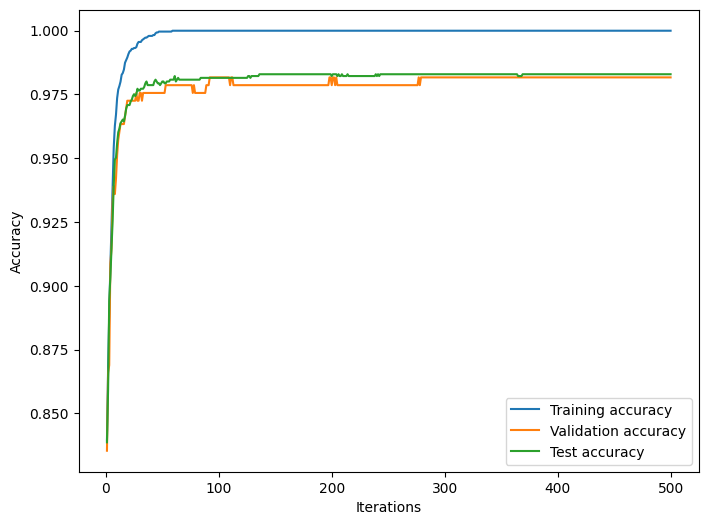

In [ ]:
# Initialize lists to store accuracies of training, validation, and test
train_accuracies = []
valid_accuracies = []
test_accuracies = []

# Train the classifier and calculate accuracies at each iteration
for i in range(500):
    mlp.partial_fit(x_train_scaled, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(x_train_scaled, y_train))
    valid_accuracies.append(mlp.score(x_valid_scaled, y_valid))
    test_accuracies.append(mlp.score(x_test_scaled, y_test))

# Plot accuracies of training, validation, and test
plt.figure(figsize=(8, 6))
plt.plot(range(1, 501), train_accuracies, label='Training accuracy')
plt.plot(range(1, 501), valid_accuracies, label='Validation accuracy')
plt.plot(range(1, 501), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Now we see that our accuracies trend upwards as we iterate more

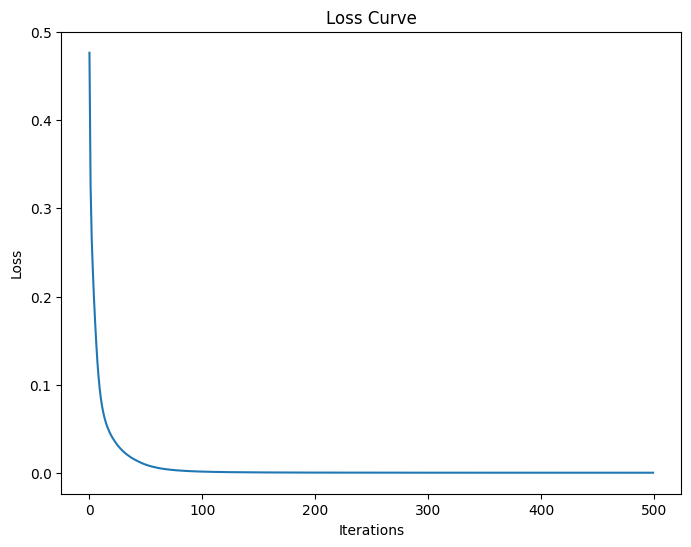

In [ ]:
# Displaying the loss curve
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

Loss curve approaches zero as we iterate more

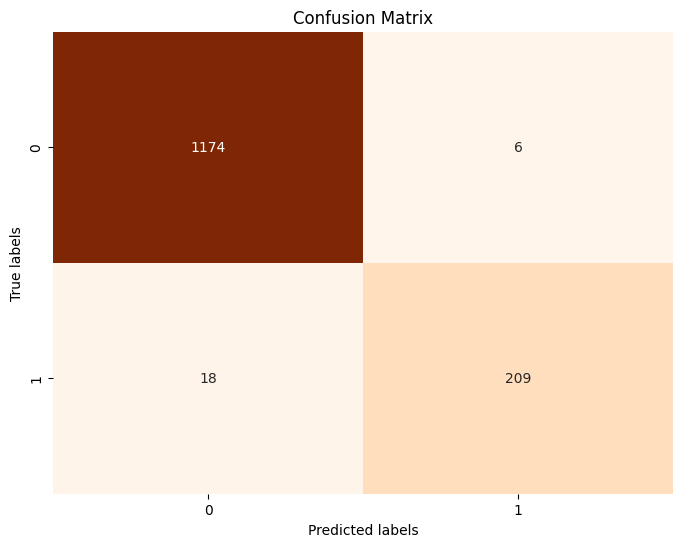

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predicted labels for test set
y_pred = mlp.predict(x_test_scaled)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix by heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix tells us that we pridected 1174 of 1192 non hazardous asteroids, and 209 out of 215 hazardous ones

Conclusion: Initially, we excluded 'Equinox', 'Orbit Determination Date', 'Orbiting Body', 'Neo Reference ID', 'Name', 'Epoch Date Close Approach', and 'Close Approach Date' from our predictor variables, as they were irrelevant for determining asteroid hazard. Also, we trained the model using two hidden layers with 100 and 50 neurons respectively, iterating over 500 cycles. After refining hyperparameters, we settled on a final model with two hidden layers containing 150 and 50 neurons. Our final test accuract was about 98%.